In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import LSTM as lstm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout

Using TensorFlow backend.


In [3]:
np.random.seed(7)

In [4]:
df = pd.read_csv('fourth_dataset_LSTM.csv',header=None)

In [5]:
df = df.iloc[0:8400,:]

In [6]:
dataset = df.values

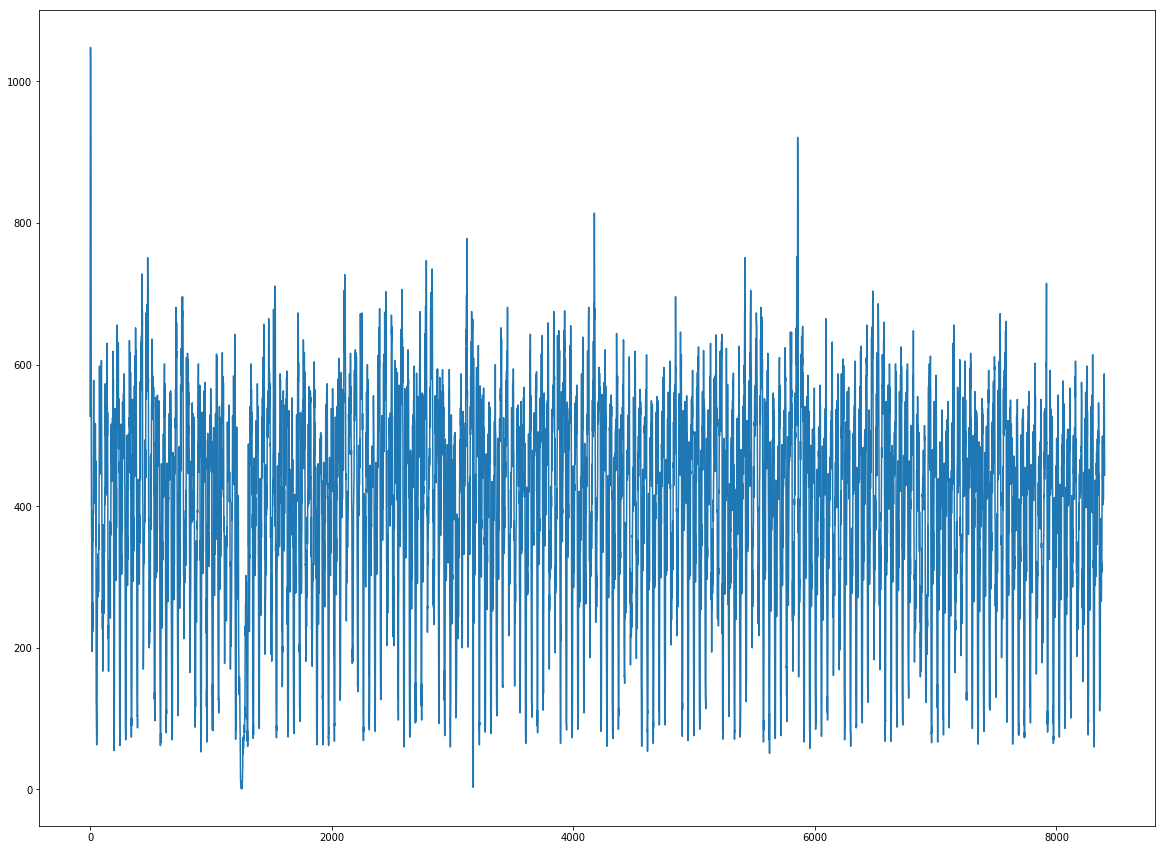

In [7]:
plt.figure(figsize=(20,15))
plt.plot(dataset)

plt.show()

In [8]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

/usr/local/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
#train_size = int(len(dataset) * 0.7)
train_size = 8064
test_size = len(dataset) - train_size + 336
train, test = dataset[0:train_size,:], dataset[train_size-336:len(dataset),:]
print(len(train), len(test))

(8064, 672)


In [10]:
def create_dataset(data, look_back):
    dataX, dataY = [], []
    for i in range(len(data)-look_back):
        a = data[i:(i+look_back), 0]
        dataX.append(a)
        b = data[(i + look_back), 0]
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [11]:
train.shape

(8064, 1)

In [12]:
look_back = 336
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [13]:
trainX.shape

(7728, 336)

In [14]:
trainY.shape

(7728,)

In [15]:
testX.shape

(336, 336)

In [16]:
#trainX
trainX

array([[ 0.50238777,  0.67621777,  0.83190067, ...,  0.56064947,
         0.47946514,  0.56160458],
       [ 0.67621777,  0.83190067,  0.9226361 , ...,  0.47946514,
         0.56160458,  0.40305635],
       [ 0.83190067,  0.9226361 ,  1.        , ...,  0.56160458,
         0.40305635,  0.45081184],
       ..., 
       [ 0.50811843,  0.51193887,  0.47277937, ...,  0.51289398,
         0.48615091,  0.49761223],
       [ 0.51193887,  0.47277937,  0.4078319 , ...,  0.48615091,
         0.49761223,  0.51957975],
       [ 0.47277937,  0.4078319 ,  0.29035339, ...,  0.49761223,
         0.51957975,  0.43935053]])

In [17]:
trainY

array([ 0.40305635,  0.45081184,  0.30276982, ...,  0.51957975,
        0.43935053,  0.50907354])

In [18]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [19]:
trainX

array([[[ 0.50238777,  0.67621777,  0.83190067, ...,  0.56064947,
          0.47946514,  0.56160458]],

       [[ 0.67621777,  0.83190067,  0.9226361 , ...,  0.47946514,
          0.56160458,  0.40305635]],

       [[ 0.83190067,  0.9226361 ,  1.        , ...,  0.56160458,
          0.40305635,  0.45081184]],

       ..., 
       [[ 0.50811843,  0.51193887,  0.47277937, ...,  0.51289398,
          0.48615091,  0.49761223]],

       [[ 0.51193887,  0.47277937,  0.4078319 , ...,  0.48615091,
          0.49761223,  0.51957975]],

       [[ 0.47277937,  0.4078319 ,  0.29035339, ...,  0.49761223,
          0.51957975,  0.43935053]]])

In [20]:
model = Sequential()
model.add(lstm(4, input_shape=(1, look_back)))
#model.add(lstm(5,return_sequences=False))
#model.add(Dropout(0.8))

#model.add(lstm(input_dim=336,output_dim=50,return_sequences=True))
#model.add(lstm(100,return_sequences=False))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam')


In [21]:
model.fit(trainX, trainY, epochs=15, batch_size=1, verbose=2)

Epoch 1/15
16s - loss: 0.0050
Epoch 2/15
16s - loss: 0.0030
Epoch 3/15
16s - loss: 0.0028
Epoch 4/15
16s - loss: 0.0026
Epoch 5/15
16s - loss: 0.0024
Epoch 6/15
16s - loss: 0.0024
Epoch 7/15
16s - loss: 0.0023
Epoch 8/15
16s - loss: 0.0022
Epoch 9/15
16s - loss: 0.0022
Epoch 10/15
16s - loss: 0.0022
Epoch 11/15
16s - loss: 0.0021
Epoch 12/15
16s - loss: 0.0021
Epoch 13/15
16s - loss: 0.0021
Epoch 14/15
16s - loss: 0.0020
Epoch 15/15
16s - loss: 0.0020


In [22]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
#trainPredict = scaler.inverse_transform(trainPredict)
#trainY = scaler.inverse_transform(trainY)
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform(testY)


In [23]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)


In [24]:
testPredict.shape

(336, 1)

In [25]:
#trainY = scaler.inverse_transform(trainY)
trainY = trainY.reshape(-1,1)
testY = testY.reshape(-1,1)
#trainY.shape

In [26]:
trainY = scaler.inverse_transform(trainY)

testY = scaler.inverse_transform(testY)

In [27]:
trainY

array([[ 423.],
       [ 473.],
       [ 318.],
       ..., 
       [ 545.],
       [ 461.],
       [ 534.]])

In [28]:
testY.shape

(336, 1)

In [29]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 44.41 RMSE
Test Score: 45.12 RMSE


In [30]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [31]:
def mape_vectorized_v2(a, b): 
    mask = a <> 0
    return (np.fabs(a - b)/a)[mask].mean() * 100

In [32]:
print(mean_absolute_percentage_error(trainY[:,0],trainPredict[:,0]))

#mean_absolute_percentage_error(25,30)

print(mape_vectorized_v2(trainY[:,0],trainPredict[:,0]))
print(mape_vectorized_v2(testY[:,0],testPredict[:,0]))

20.103934693
20.103934693
11.3512558168


In [33]:
df_output = pd.DataFrame(testY,testPredict)
df_output.to_csv("output_ts_4_1.csv")

In [39]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (336,1) into shape (0,1)